# Compare IBM's influence on individuals inside/outdside IBM
Author: Daheng Wang  
Last updated: 2017-06-15

# Roadmap
1. Filter out retweets of IBM tweets
2. Aggregate retweet_count separately to IBM/non-IBM users
3. Get IBM users' IBM/non-IBM followers count
4. Plot IBM's influence to IBM/non-IBM users

# Steps

In [1]:
"""
Initialization
"""

'''
Data analysis modules: pandas, matplotlib, numpy, and etc.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # render double resolution plot output for Retina screens 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''
Standard modules, MongoDB modules
'''
import os, sys, json, datetime, pickle, multiprocessing, logging
from pprint import pprint

import pymongo
from pymongo import IndexModel, ASCENDING, DESCENDING

'''
Custom tool modules
'''
import mongodb  # module for setting up connection with (local) MongoDB database
import multiprocessing_workers  # module for splitting workloads between processes
import utilities  # module for various custom utility functions
from config import * # import all global configuration variables

'''
Misc
'''
NB_NAME = '20170507-compare_influence_inside_outside'

## Filter out retweets of IBM tweets

We define "IBM tweets" as native tweets posted by IBM users.  

**NOTE** we only consider IBM users of M1 (based on 'description field').  
We can only afford to query all followers information from Twitter API on the size of the IBM users of M1.

In [2]:
"""
Read in IBM users info
"""
if 1 == 1:
    user_nt_ibm_desc_ids_lst = []
    
    with open(USER_NT_IBM_DESC_IDS_LST_PKL, 'rb') as f:
        user_nt_ibm_desc_ids_lst = pickle.load(f)

In [4]:
"""
Filter out retweets of IBM tweets (multiprocessing) and write to intermediate files
"""
if 0 == 1:
    procedure_name = 'filter_{}_rt_ibm_tweets'.format(TW_RT_COL)
    
    multiprocessing.log_to_stderr(logging.DEBUG)
    process_n = multiprocessing.cpu_count() - 1 # set processes number to CPU numbers minus 1
    suffix = 'json'
    inter_files = utilities.gen_inter_filenames_list(NB_NAME, procedure_name, process_n, suffix)
    
    jobs = []
    for batch_i in range(process_n):
        
        p = multiprocessing.Process(target=multiprocessing_workers.worker_filter_rt_ibm_tweets,
                                    args=(DB_NAME, TW_RT_COL, batch_i, process_n, inter_files[batch_i], user_nt_ibm_desc_ids_lst),
                                    name='Process-{}/{}'.format(batch_i, process_n))
        jobs.append(p)
    
    for job in jobs:
        job.start()
        
    for job in jobs:
        job.join()

[INFO/Process-0/11] child process calling self.run()
[INFO/Process-0/11] child process calling self.run()
[INFO/Process-3/11] child process calling self.run()
[INFO/Process-1/11] child process calling self.run()
[INFO/Process-1/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!
MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-3/11] child process calling self.run()
[INFO/Process-2/11] child process calling self.run()
[INFO/Process-4/11] child process calling self.run()
[INFO/Process-4/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!
MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-5/11] child process calling self.run()


Process0/11 handling documents 0 to 529328...


[INFO/Process-2/11] child process calling self.run()
[INFO/Process-5/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-6/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-6/11] child process calling self.run()
[INFO/Process-7/11] child process calling self.run()
[INFO/Process-7/11] child process calling self.run()
[INFO/Process-8/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!
MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-8/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-9/11] child process calling self.run()
[INFO/Process-9/11] child process calling self.run()
[INFO/Process-10/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-10/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!
Process1/11 handling documents 529329 to 1058657...
Process2/11 handling documents 1058658 to 1587986...
Process3/11 handling documents 1587987 to 2117315...
Process4/11 handling documents 2117316 to 2646644...
Process5/11 handling documents 2646645 to 3175973...
Process6/11 handling documents 3175974 to 3705302...
Process7/11 handling documents 3705303 to 4234631...
Process8/11 handling documents 4234632 to 4763960...
Process9/11 handling documents 4763961 to 5293289...
Process10/11 handling documents 5293290 to 5822626...


[INFO/Process-0/11] process shutting down
[INFO/Process-0/11] process shutting down
[DEBUG/Process-0/11] running all "atexit" finalizers with priority >= 0
[DEBUG/Process-0/11] running all "atexit" finalizers with priority >= 0
[DEBUG/Process-0/11] running the remaining "atexit" finalizers
[DEBUG/Process-0/11] running the remaining "atexit" finalizers
[INFO/Process-0/11] process exiting with exitcode 0
[INFO/Process-0/11] process exiting with exitcode 0
[INFO/Process-1/11] process shutting down
[INFO/Process-1/11] process shutting down
[DEBUG/Process-1/11] running all "atexit" finalizers with priority >= 0
[DEBUG/Process-1/11] running all "atexit" finalizers with priority >= 0
[DEBUG/Process-1/11] running the remaining "atexit" finalizers
[DEBUG/Process-1/11] running the remaining "atexit" finalizers
[INFO/Process-1/11] process exiting with exitcode 0
[INFO/Process-1/11] process exiting with exitcode 0
[INFO/Process-2/11] process shutting down
[INFO/Process-2/11] process shutting down


In [4]:
"""
Build a new collection for retweets of IBM tweets

Register in config:
    TW_RT_IBM_TW_COL = 'tw_rt_ibm_tw'
"""
if 0 == 1:
    '''
    Generate the names of the intermediate files
    '''
    procedure_name = 'filter_{}_rt_ibm_tweets'.format(TW_RT_COL)
    process_n = multiprocessing.cpu_count() - 1 # set processes number to CPU numbers minus 1
    suffix = 'json'
    inter_files = utilities.gen_inter_filenames_list(NB_NAME, procedure_name, process_n, suffix)
        
    tw_rt_ibm_tw_col = mongodb.initialize(db_name=DB_NAME, collection_name=TW_RT_IBM_TW_COL)
    for inter_file in inter_files:
        print('Reading {}...'.format(inter_file), end=' ')
        lines = open(inter_file).readlines()
        parsed_jsons = [json.loads(line) for line in lines]
        print('Importing into {}.{}...'.format(DB_NAME, TW_RT_IBM_TW_COL))
        tw_rt_ibm_tw_col.insert_many(parsed_jsons)
    print('Done')

MongoDB on localhost:27017/tweets_ek-2.tw_rt_ibm_tw connected successfully!
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-0.json... Importing into tweets_ek-2.tw_rt_ibm_tw...
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-1.json... Importing into tweets_ek-2.tw_rt_ibm_tw...
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-2.json... Importing into tweets_ek-2.tw_rt_ibm_tw...
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-3.json... Importing into tweets_ek-2.tw_rt_ibm_tw...
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-4.json... Importing into tweets_ek-2.tw_rt_ibm_tw...
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-5.json... Importing into tweets_ek-2.tw_rt_ibm_tw...
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-6.json... Importing into 

In [ ]:
"""
Build index
"""
if 0 == 1:
    tw_rt_ibm_tw_col.create_index([('user.id', pymongo.ASCENDING)])
    print('Done')

In [3]:
"""
Check new collection
"""
if 1 == 1:
    tw_rt_ibm_tw_col = mongodb.initialize(db_name=DB_NAME, collection_name=TW_RT_IBM_TW_COL)
    print('{} docs in new col'.format(tw_rt_ibm_tw_col.count()))
    
    '''
    Check if all cascade tweets are retweets
    '''
    doc = tw_rt_ibm_tw_col.find_one(filter={'retweeted_status': {'$exists': False}})
    pprint(doc)
    
    '''
    Check if all cascade tweets are retweets of IBM tweets (M1)
    '''
    user_nt_ibm_desc_ids_lst = []
    with open(USER_NT_IBM_DESC_IDS_LST_PKL, 'rb') as f:
        user_nt_ibm_desc_ids_lst = pickle.load(f)
    print('lst lentght: {}'.format(len(user_nt_ibm_desc_ids_lst)))
        
    lst_arg = np.array(user_nt_ibm_desc_ids_lst, dtype=np.int64).tolist() # IMPORTANT force int64 type
    doc = tw_rt_ibm_tw_col.find_one(filter={'retweeted_status.user.id': {'$nin': lst_arg}})
    pprint(doc)

MongoDB on localhost:27017/tweets_ek-2.tw_rt_ibm_tw connected successfully!
134327 docs in new col
None
lst lentght: 6271
None


## Aggregate retweet_count separately to IBM/non-IBM users

### Tag out IBM users among authors of retweets on IBM tweets (based on 'description' field)

In [3]:
user_tw_rt_ibm_tw_ibm_ids_lst_pickle = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'user_tw_rt_ibm_tw_ibm_ids.lst.pickle'))
user_tw_rt_ibm_tw_nonibm_ids_lst_pickle = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'user_tw_rt_ibm_tw_nonibm_ids.lst.pickle'))

In [3]:
"""
Tag out IBM users among authors of retweets on IBM tweets (based on 'description' field)
"""
if 0 == 1:
    '''
    Get all authors information of retweets on IBM tweets (based on TW_RT_IBM_TW_COL)
    '''
    tw_rt_ibm_tw_col = mongodb.initialize(db_name=DB_NAME, collection_name=TW_RT_IBM_TW_COL)
    cursor = tw_rt_ibm_tw_col.find(projection={'_id': 0, 'user': 1})
    
    '''
    Tag each author whether the keyword 'ibm' appears in the user's 'description' field
    '''
    keyword = 'ibm'
    user_tw_rt_ibm_tw_ids_set = set()
    user_tw_rt_ibm_tw_ibm_ids_set = set()
    user_tw_rt_ibm_tw_nonibm_ids_set = set()
    
    # list of users changed their description field (removed keyword 'ibm')
#     test_ids_lst = [476448192, 857573355486154752, 
#                     831064874323148800, 847825433710272515, 
#                     545854982, 714744362043908102, 
#                     397984967, 14574121, 97288586, 
#                     4157525007, 283533519, 18906101, 
#                     58946043]
    
    for doc in cursor:
        user_tw_rt_ibm_tw_id = int(doc['user']['id'])
        user_tw_rt_ibm_tw_desc = doc['user']['description']
        
        user_tw_rt_ibm_tw_ids_set.add(user_tw_rt_ibm_tw_id)
               
        if utilities.simple_test_keyword_in_text(text=user_tw_rt_ibm_tw_desc, keyword=keyword):
            user_tw_rt_ibm_tw_ibm_ids_set.add(user_tw_rt_ibm_tw_id)
    
    print('Unique authors of retweets on IBM tweets: {}'.format(len(user_tw_rt_ibm_tw_ids_set)))
    
    '''
    Pickle taged IBM/non-IBM authors of retweets on IBM tweets
    '''
    print('Dumping IBM authors of retweets on IBM tweets: {}'.format(len(user_tw_rt_ibm_tw_ibm_ids_set)))
    with open(user_tw_rt_ibm_tw_ibm_ids_lst_pickle, 'wb') as f:
        pickle.dump(list(user_tw_rt_ibm_tw_ibm_ids_set), f)
    
    user_tw_rt_ibm_tw_nonibm_ids_set = user_tw_rt_ibm_tw_ids_set.difference(user_tw_rt_ibm_tw_ibm_ids_set)
    print('Dumping non-IBM authors of retweets on IBM tweets: {}'.format(len(user_tw_rt_ibm_tw_nonibm_ids_set)))
    with open(user_tw_rt_ibm_tw_nonibm_ids_lst_pickle, 'wb') as f:
        pickle.dump(list(user_tw_rt_ibm_tw_nonibm_ids_set), f)

MongoDB on localhost:27017/tweets_ek-2.tw_rt_ibm_tw connected successfully!
Unique authors of retweets on IBM tweets: 36028
Dumping IBM authors of retweets on IBM tweets: 4760
Dumping non-IBM authors of retweets on IBM tweets: 31268


In [8]:
"""
Check results
"""
if 0 == 1:
    user_nt_ibm_desc_ids_lst = []
    with open(USER_NT_IBM_DESC_IDS_LST_PKL, 'rb') as f:
        user_nt_ibm_desc_ids_lst = pickle.load(f)
    user_nt_ibm_desc_ids_set = set(user_nt_ibm_desc_ids_lst)
    print('M1 IBM users: {}'.format(len(user_nt_ibm_desc_ids_lst)))

    tw_rt_ibm_tw_col = mongodb.initialize(db_name=DB_NAME, collection_name=TW_RT_IBM_TW_COL)
    all_users_ids_lst = tw_rt_ibm_tw_col.distinct('user.id')
    all_users_ids_set = set(all_users_ids_lst)
    print("Unique authors of retweets of IBM tweets: {}".format(len(all_users_ids_lst)))
    
    user_tw_rt_ibm_tw_ibm_ids_lst = []
    with open(user_tw_rt_ibm_tw_ibm_ids_lst_pickle, 'rb') as f:
        user_tw_rt_ibm_tw_ibm_ids_lst = pickle.load(f)
    user_tw_rt_ibm_tw_ibm_ids_set = set(user_tw_rt_ibm_tw_ibm_ids_lst)
    print("Tagged IBM authors of retweets on M1 IBM users' tweets: {}".format(len(user_tw_rt_ibm_tw_ibm_ids_lst)))
        
    user_tw_rt_ibm_tw_nonibm_ids_lst = []
    with open(user_tw_rt_ibm_tw_nonibm_ids_lst_pickle, 'rb') as f:
        user_tw_rt_ibm_tw_nonibm_ids_lst = pickle.load(f)
    user_tw_rt_ibm_tw_nonibm_ids_set = set(user_tw_rt_ibm_tw_nonibm_ids_lst)
    print("Tagged non-IBM authors of retweets on M1 IBM users' tweets: {}".format(len(user_tw_rt_ibm_tw_nonibm_ids_lst)))

    intersection = user_nt_ibm_desc_ids_set.intersection(user_tw_rt_ibm_tw_nonibm_ids_set)
    print('{}'.format(len(intersection)))
    print(list(intersection))
    
    intersection = user_tw_rt_ibm_tw_ibm_ids_set.intersection(user_tw_rt_ibm_tw_nonibm_ids_set)
    print('{}'.format(len(intersection)))
    print(list(intersection))

M1 IBM users: 6271
MongoDB on localhost:27017/tweets_ek-2.tw_rt_ibm_tw connected successfully!
Unique authors of retweets of IBM tweets: 36028
Tagged IBM authors of retweets on M1 IBM users' tweets: 4760
Tagged non-IBM authors of retweets on M1 IBM users' tweets: 31268
13
[476448192, 857573355486154752, 831064874323148800, 847825433710272515, 545854982, 714744362043908102, 397984967, 14574121, 97288586, 4157525007, 283533519, 18906101, 58946043]
0
[]


### Aggregate retweet_count on individual 'retweeted native IBM tweets' first, then on individual M1 IBM users

In [2]:
'''
Pickle for IBM cascade to all users reweet_count
'''
ibm_cascade_all_pkl = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'ibm_cascade_all.lst.pkl'))

'''
Pickle for IBM cascade to IBM users reweet_count
'''
ibm_cascade_ibm_pkl = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'ibm_cascade_ibm.lst.pkl'))

'''
Pickle for pickle for IBM cascade to non-IBM users reweet_count
'''
ibm_cascade_nonibm_pkl = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'ibm_cascade_nonibm.lst.pkl'))

In [5]:
"""
Aggregate IBM cascade to all users
"""
TMP_COL = 'tmp'
if 0 == 1:
    '''
    Clean 'tmp' collection if necessary
    '''
    db = mongodb.initialize_db(db_name=DB_NAME)
    if TMP_COL in db.collection_names():
        print('"{}" collection already exists. Drop...'.format(TMP_COL))
        db[TMP_COL].drop()
    
    '''
    Aggregate retweet_count on individual 'retweeted native IBM tweets' first
    Write to tmp collection
    '''
    group_dict = {'$group': {'_id': '$retweeted_status.id', # group by id of 'retweeted native IBM tweets'
                             'all_rt_count': {'$sum': 1}, # aggregate retweet_count of each 'retweeted native IBM tweet' on all users
                             'user_id': {'$first': '$retweeted_status.user.id'}, # get author's id of each 'retweeted native IBM tweet'
                             'user_followers_count': {'$first': '$retweeted_status.user.followers_count'} # get author's followers number of each 'retweeted native IBM tweet'
                             }}
    project_dict = {'$project': {'_id': 0,
                                'id': '$_id',
                                'all_rt_count': 1,
                                'user_id': 1,
                                'user_followers_count': 1}}
    out_dic = {'$out': TMP_COL}
    
    ppl_lst = [group_dict, project_dict, out_dic]
    print('Aggreating on collection "{}"'.format(TW_RT_IBM_TW_COL))
    tw_rt_ibm_tw_col = db[TW_RT_IBM_TW_COL]
    tw_rt_ibm_tw_col.aggregate(pipeline=ppl_lst, 
                               allowDiskUse=True) # Exceeded memory limit for $group, but didn't allow external sort. Pass allowDiskUse:true to opt in
    
    '''
    Aggregate on individual M1 IBM users
    '''
    data_lst = []
    group_dict = {'$group': {'_id': '$user_id', # group by id of authors of 'retweeted native IBM tweets' (id of M1 IBM users)
                             'followers_count': {'$first': '$user_followers_count'},
                             'all_rt_num': {'$sum': 1}, # aggregate the number of 'retweeted native IBM tweets' authored by each M1 IBM user
                             'all_sum_rt_count': {'$sum': '$all_rt_count'} # aggregate the sum of retweet_count on all 'retweeted native IBM tweets' authored by each M1 IBM user
                             }}
    project_dict = {'$project': {'_id': 0,
                                 'user_id': '$_id',
                                 'followers_count': 1,
                                 'all_rt_num': 1,
                                 'all_sum_rt_count': 1
                                }}
    ppl_lst = [group_dict, project_dict]
    
    print('Aggreating on collection "{}"'.format(TMP_COL))
    tmp_col = db[TMP_COL]
    cursor = tmp_col.aggregate(pipeline=ppl_lst)
    for doc in cursor:
        data_lst.append(doc)
    
    '''
    Pickle results
    '''
    with open(ibm_cascade_all_pkl, 'wb') as f:
        pickle.dump(data_lst, f)
    print('Done')

MongoDB on localhost:27017/tweets_ek-2 connected successfully!
"tmp" collection already exists. Drop...
Aggreating on collection "tw_rt_ibm_tw"
Aggreating on collection "tmp"
Done


In [6]:
"""
Aggregate IBM cascade to IBM users
"""
if 0 == 1:
    '''
    Clean 'tmp' collection if necessary
    '''
    db = mongodb.initialize_db(db_name=DB_NAME)
    if TMP_COL in db.collection_names():
        print('"{}" collection already exists. Drop...'.format(TMP_COL))
        db[TMP_COL].drop()
    
    '''
    Aggregate retweet_count on individual 'retweeted native IBM tweets' first
    Only consider retweets authored by IBM users
    Write to tmp collection
    '''
    user_tw_rt_ibm_tw_ibm_ids_lst = []
    with open(user_tw_rt_ibm_tw_ibm_ids_lst_pickle, 'rb') as f:
        user_tw_rt_ibm_tw_ibm_ids_lst = pickle.load(f)
        
    lst_arg = np.array(user_tw_rt_ibm_tw_ibm_ids_lst, dtype=np.int64).tolist() # IMPORTANT force int64 type
    match_dict = {'$match': {'user.id': {'$in': lst_arg}}} # select out retweets authored by IBM users
    
    group_dict = {'$group': {'_id': '$retweeted_status.id', # group by id of 'retweeted native IBM tweets'
                             'ibm_rt_count': {'$sum': 1}, # aggregate retweet_count of each 'retweeted native IBM tweet' on IBM users
                             'user_id': {'$first': '$retweeted_status.user.id'} # get author's id of each 'retweeted native IBM tweet'
                             }}
    project_dict = {'$project': {'_id': 0,
                                'id': '$_id',
                                'ibm_rt_count': 1,
                                'user_id': 1}}
    out_dic = {'$out': TMP_COL}
    
    ppl_lst = [match_dict, group_dict, project_dict, out_dic]
    
    print('Aggreating on collection "{}"'.format(TW_RT_IBM_TW_COL))
    tw_rt_ibm_tw_col = db[TW_RT_IBM_TW_COL]
    tw_rt_ibm_tw_col.aggregate(pipeline=ppl_lst,
                               allowDiskUse=True) # Exceeded memory limit for $group, but didn't allow external sort. Pass allowDiskUse:true to opt in.)
    
    '''
    Aggregate on individual M1 IBM users
    '''
    data_lst = []
    group_dict = {'$group': {'_id': '$user_id', # group by id of authors of 'retweeted native IBM tweets' (id of M1 IBM users)
                             'ibm_rt_num': {'$sum': 1}, # aggregate the number of 'retweeted native IBM tweets' authored by each M1 IBM user
                             'ibm_sum_rt_count': {'$sum': '$ibm_rt_count'} # aggregate the sum of retweet_count on all 'retweeted native IBM tweets' authored by each M1 IBM user
                             }}
    project_dict = {'$project': {'_id': 0,
                                 'user_id': '$_id',
                                 'ibm_rt_num': 1,
                                 'ibm_sum_rt_count': 1
                                }}
    ppl_lst = [group_dict, project_dict]
    
    print('Aggreating on collection "{}"'.format(TMP_COL))
    tmp_col = db[TMP_COL]
    cursor = tmp_col.aggregate(pipeline=ppl_lst)
    for doc in cursor:
        data_lst.append(doc)
    
    '''
    Pickle results
    '''
    with open(ibm_cascade_ibm_pkl, 'wb') as f:
        pickle.dump(data_lst, f)
    print('Done')

MongoDB on localhost:27017/tweets_ek-2 connected successfully!
"tmp" collection already exists. Drop...
Aggreating on collection "tw_rt_ibm_tw"
Aggreating on collection "tmp"
Done


In [7]:
"""
Aggregate IBM cascade to non-IBM users
"""
if 0 == 1:
    '''
    Clean 'tmp' collection if necessary
    '''
    db = mongodb.initialize_db(db_name=DB_NAME)
    if TMP_COL in db.collection_names():
        print('"{}" collection already exists. Drop...'.format(TMP_COL))
        db[TMP_COL].drop()
    
    '''
    Aggregate retweet_count on individual 'retweeted native IBM tweets' first
    Only consider retweets authored by non-IBM users
    Write to tmp collection
    '''
    user_tw_rt_ibm_tw_nonibm_ids_lst = []
    with open(user_tw_rt_ibm_tw_nonibm_ids_lst_pickle, 'rb') as f:
        user_tw_rt_ibm_tw_nonibm_ids_lst = pickle.load(f)
        
    lst_arg = np.array(user_tw_rt_ibm_tw_nonibm_ids_lst, dtype=np.int64).tolist() # IMPORTANT force int64 type
    match_dict = {'$match': {'user.id': {'$in': lst_arg}}} # select out retweets authored by non-IBM users
    
    group_dict = {'$group': {'_id': '$retweeted_status.id', # group by id of 'retweeted native IBM tweets'
                             'nonibm_rt_count': {'$sum': 1}, # aggregate retweet_count of each 'retweeted native IBM tweet' on non-IBM users
                             'user_id': {'$first': '$retweeted_status.user.id'} # get author's id of each 'retweeted native IBM tweet'
                             }}
    project_dict = {'$project': {'_id': 0,
                                'id': '$_id',
                                'nonibm_rt_count': 1,
                                'user_id': 1}}
    out_dic = {'$out': TMP_COL}
    
    ppl_lst = [match_dict, group_dict, project_dict, out_dic]
    
    print('Aggreating on collection "{}"'.format(TW_RT_IBM_TW_COL))
    tw_rt_ibm_tw_col = db[TW_RT_IBM_TW_COL]
    tw_rt_ibm_tw_col.aggregate(pipeline=ppl_lst,
                               allowDiskUse=True) # Exceeded memory limit for $group, but didn't allow external sort. Pass allowDiskUse:true to opt in.
    
    '''
    Aggregate on individual M1 IBM users
    '''
    data_lst = []
    group_dict = {'$group': {'_id': '$user_id', # group by id of authors of 'retweeted native IBM tweets' (id of M1 IBM users)
                             'nonibm_rt_num': {'$sum': 1}, # aggregate the number of 'retweeted native IBM tweets' authored by each M1 IBM user
                             'nonibm_sum_rt_count': {'$sum': '$nonibm_rt_count'} # aggregate the sum of retweet_count on all 'retweeted native IBM tweets' authored by each M1 IBM user
                             }}
    project_dict = {'$project': {'_id': 0,
                                 'user_id': '$_id',
                                 'nonibm_rt_num': 1,
                                 'nonibm_sum_rt_count': 1
                                }}
    ppl_lst = [group_dict, project_dict]
    
    print('Aggreating on collection "{}"'.format(TMP_COL))
    tmp_col = db[TMP_COL]
    cursor = tmp_col.aggregate(pipeline=ppl_lst)
    for doc in cursor:
        data_lst.append(doc)
    
    '''
    Pickle results
    '''
    with open(ibm_cascade_nonibm_pkl, 'wb') as f:
        pickle.dump(data_lst, f)
    print('Done')

MongoDB on localhost:27017/tweets_ek-2 connected successfully!
"tmp" collection already exists. Drop...
Aggreating on collection "tw_rt_ibm_tw"
Aggreating on collection "tmp"
Done


In [8]:
"""
Read in local pickle files, merge results, and output global df pickle file in data dir

Register in config:
    IBM_CASCADE_PKL = os.path.join(DATA_DIR, 'ibm_cascade.df.pkl')
"""
if 0 == 1:
    data_lst = []
    with open(ibm_cascade_all_pkl, 'rb') as f:
        data_lst = pickle.load(f)
    column_names = ['user_id', 'followers_count', 'all_rt_num', 'all_sum_rt_count']
    df_all = pd.DataFrame(data=data_lst,
                          columns=column_names, # explicitly pass in names of columns
                          dtype=int)
    
    with open(ibm_cascade_ibm_pkl, 'rb') as f:
        data_lst = pickle.load(f)
    column_names = ['user_id', 'ibm_rt_num', 'ibm_sum_rt_count']
    df_ibm = pd.DataFrame(data=data_lst,
                          columns=column_names, # explicitly pass in names of columns
                          dtype=int)
    
    with open(ibm_cascade_nonibm_pkl, 'rb') as f:
        data_lst = pickle.load(f)
    column_names = ['user_id', 'nonibm_rt_num', 'nonibm_sum_rt_count']
    df_nonibm = pd.DataFrame(data=data_lst,
                             columns=column_names, # explicitly pass in names of columns
                             dtype=int)
    
    df = pd.merge(df_all, df_ibm, on = 'user_id', how='left')
    df = pd.merge(df, df_nonibm, on = 'user_id', how='left')
    
    column_names = {'user_id': 'uid',
                    'followers_count': 'fo',
                    'all_rt_num': 'all_n',
                    'all_sum_rt_count': 'all_srt',
                    'ibm_rt_num': 'ibm_n',
                    'ibm_sum_rt_count': 'ibm_srt',
                    'nonibm_rt_num': 'nonibm_n',
                    'nonibm_sum_rt_count': 'nonibm_srt'
                   }
    
    df = df.rename(columns=column_names)
    
    '''
    Use pandas built-in pickle function
    '''
    df.to_pickle(IBM_CASCADE_PKL)
    print('Done')

Done


## Get IBM users' IBM/non-IBM followers count

In [5]:
"""
For each author of retweets on 'native IBM tweets', tag out IBM users among all his followers
"""
import glob

if 0 == 1:
    '''
    Followers information of M1 IBM users queried from Twitter API are stored in 2 separate folders
    '''
    followers_objs_dir1 = '/home/dwang8/Documents/workspace/ibm_tweets_projecct-collector-4/follower_objs'
    followers_objs_dir2 = '/home/dwang8/Documents/workspace-2/ibm_tweets_projecct-collector-4/follower_objs'
    
    hydrated_uids_dir = followers_objs_dir2
    
    '''
    Read in list of hydrated uids
    '''
    hydrated_uids_lst = []
    for json_path in sorted(glob.glob(os.path.join(hydrated_uids_dir, '*.json'))):
        json_name = json_path.split('/')[-1]
        hydrated_uid = int(json_name.split('.')[0])
        hydrated_uids_lst.append(hydrated_uid)
    print('Hydrated uids read in: {}'.format(len(hydrated_uids_lst)))

    
    '''
    For each hydrated user, count how many followers have keyword "ibm" in "description" field
    '''
    procedure_name = 'count_ibm_followers_ibm_users-2'
    multiprocessing.log_to_stderr(logging.DEBUG)
    process_n = multiprocessing.cpu_count() - 1 # set processes number to CPU numbers minus 1
    suffix = 'json'
    inter_files = utilities.gen_inter_filenames_list(NB_NAME, procedure_name, process_n, suffix)
    
    jobs = []
    for batch_i in range(process_n):
        
        p = multiprocessing.Process(target=multiprocessing_workers.worker_count_ibm_followers_ibm_users,
                                    args=(hydrated_uids_dir, batch_i, process_n, inter_files[batch_i], hydrated_uids_lst),
                                    name='Process({}/{})'.format((batch_i + 1), process_n))
        jobs.append(p)
    
    for job in jobs:
        job.start()
        
    for job in jobs:
        job.join()
    
    print('Done')

Hydrated uids read in: 3640


[INFO/Process(1/11)] child process calling self.run()
[INFO/Process(1/11)] child process calling self.run()
[INFO/Process(2/11)] child process calling self.run()
[INFO/Process(2/11)] child process calling self.run()
[INFO/Process(1/11)] child process calling self.run()
[INFO/Process(2/11)] child process calling self.run()
[INFO/Process(1/11)] child process calling self.run()


Process (2/11) handling files: 330-659...
Process (1/11) handling files: 0-329...


[INFO/Process(3/11)] child process calling self.run()
[INFO/Process(2/11)] child process calling self.run()
[INFO/Process(3/11)] child process calling self.run()
[INFO/Process(3/11)] child process calling self.run()
[INFO/Process(4/11)] child process calling self.run()
[INFO/Process(3/11)] child process calling self.run()
[INFO/Process(4/11)] child process calling self.run()


Process (3/11) handling files: 660-989...


[INFO/Process(5/11)] child process calling self.run()
[INFO/Process(4/11)] child process calling self.run()
[INFO/Process(4/11)] child process calling self.run()
[INFO/Process(5/11)] child process calling self.run()


Process (4/11) handling files: 990-1319...


[INFO/Process(5/11)] child process calling self.run()


Process (5/11) handling files: 1320-1649...


[INFO/Process(6/11)] child process calling self.run()
[INFO/Process(5/11)] child process calling self.run()
[INFO/Process(6/11)] child process calling self.run()
[INFO/Process(6/11)] child process calling self.run()
[INFO/Process(7/11)] child process calling self.run()
[INFO/Process(6/11)] child process calling self.run()
[INFO/Process(8/11)] child process calling self.run()
[INFO/Process(8/11)] child process calling self.run()
[INFO/Process(8/11)] child process calling self.run()
[INFO/Process(7/11)] child process calling self.run()
[INFO/Process(9/11)] child process calling self.run()
[INFO/Process(8/11)] child process calling self.run()


Process (6/11) handling files: 1650-1979...


[INFO/Process(9/11)] child process calling self.run()


Process (8/11) handling files: 2310-2639...


[INFO/Process(7/11)] child process calling self.run()
[INFO/Process(9/11)] child process calling self.run()
[INFO/Process(7/11)] child process calling self.run()


Process (7/11) handling files: 1980-2309...


[INFO/Process(10/11)] child process calling self.run()
[INFO/Process(9/11)] child process calling self.run()
[INFO/Process(11/11)] child process calling self.run()


Process (9/11) handling files: 2640-2969...


[INFO/Process(10/11)] child process calling self.run()
[INFO/Process(10/11)] child process calling self.run()
[INFO/Process(11/11)] child process calling self.run()
[INFO/Process(10/11)] child process calling self.run()


Process (10/11) handling files: 2970-3299...


[INFO/Process(11/11)] child process calling self.run()
[INFO/Process(11/11)] child process calling self.run()


Process (11/11) handling files: 3300-3639...


[INFO/Process(4/11)] process shutting down
[INFO/Process(4/11)] process shutting down
[INFO/Process(4/11)] process shutting down
[INFO/Process(4/11)] process shutting down
[DEBUG/Process(4/11)] running all "atexit" finalizers with priority >= 0
[DEBUG/Process(4/11)] running all "atexit" finalizers with priority >= 0
[DEBUG/Process(4/11)] running all "atexit" finalizers with priority >= 0
[DEBUG/Process(4/11)] running all "atexit" finalizers with priority >= 0
[DEBUG/Process(4/11)] running the remaining "atexit" finalizers
[DEBUG/Process(4/11)] running the remaining "atexit" finalizers
[DEBUG/Process(4/11)] running the remaining "atexit" finalizers
[DEBUG/Process(4/11)] running the remaining "atexit" finalizers
[INFO/Process(4/11)] process exiting with exitcode 0
[INFO/Process(4/11)] process exiting with exitcode 0
[INFO/Process(4/11)] process exiting with exitcode 0
[INFO/Process(4/11)] process exiting with exitcode 0
[INFO/Process(10/11)] process shutting down
[INFO/Process(10/11)] pr

[INFO/Process(2/11)] process exiting with exitcode 0
[INFO/Process(2/11)] process exiting with exitcode 0
[INFO/Process(2/11)] process exiting with exitcode 0
[INFO/Process(2/11)] process exiting with exitcode 0
[INFO/Process(9/11)] process shutting down
[INFO/Process(9/11)] process shutting down
[INFO/Process(9/11)] process shutting down
[INFO/Process(9/11)] process shutting down
[DEBUG/Process(9/11)] running all "atexit" finalizers with priority >= 0
[DEBUG/Process(9/11)] running all "atexit" finalizers with priority >= 0
[DEBUG/Process(9/11)] running all "atexit" finalizers with priority >= 0
[DEBUG/Process(9/11)] running all "atexit" finalizers with priority >= 0
[DEBUG/Process(9/11)] running the remaining "atexit" finalizers
[DEBUG/Process(9/11)] running the remaining "atexit" finalizers
[DEBUG/Process(9/11)] running the remaining "atexit" finalizers
[DEBUG/Process(9/11)] running the remaining "atexit" finalizers
[INFO/Process(9/11)] process exiting with exitcode 0
[INFO/Process(9

Done


In [6]:
"""
Merge outputs of multiprocessing and pickle

Register in config:
    IBM_FOLLOWERS_PKL = os.path.join(DATA_DIR, 'ibm_followers.df.pkl')
"""
if 0 == 1:
    data_lst = []
    
    '''
    Read in taged IBM followers information of part 1
    '''
    procedure_name = 'count_ibm_followers_ibm_users-1'
    process_n = multiprocessing.cpu_count() - 1 # set processes number to CPU numbers minus 1
    suffix = 'json'
    inter_files = utilities.gen_inter_filenames_list(NB_NAME, procedure_name, process_n, suffix)
    
    for inter_file in inter_files:
        with open(inter_file, 'r') as f:
            for line in f:
                item = json.loads(line)
                data_lst.append(item)
    
    '''
    Read in taged IBM followers information of part 2
    '''
    
    procedure_name = 'count_ibm_followers_ibm_users-2'
    process_n = multiprocessing.cpu_count() - 1 # set processes number to CPU numbers minus 1
    suffix = 'json'
    inter_files = utilities.gen_inter_filenames_list(NB_NAME, procedure_name, process_n, suffix)
    
    for inter_file in inter_files:
        with open(inter_file, 'r') as f:
            for line in f:
                item = json.loads(line)
                data_lst.append(item)

    column_names = ['uid', 'followers_count', 'ibm_followers_count']
    df_ibm_followers = pd.DataFrame(data=data_lst, columns=column_names, dtype=int)
    
    column_names = {'uid': 'uid',
                    'followers_count': 'fo_2',
                    'ibm_followers_count': 'fo_ibm'
                   }
    
    df_ibm_followers = df_ibm_followers.rename(columns=column_names)
    
    '''
    Use pandas built-in pickle function
    '''
    df_ibm_followers.to_pickle(IBM_FOLLOWERS_PKL)
    print('Done')

Done


In [7]:
"""
Merge IBM_CASCADE_PKL and IBM_FOLLOWERS_PKL

Register in config:
    IBM_INFLUENCE_PKL = os.path.join(DATA_DIR, 'ibm_influence.df.pkl')
"""
if 0 == 1:
    df_cascade = pd.read_pickle(IBM_CASCADE_PKL)
    
    df_ibm_followers = pd.read_pickle(IBM_FOLLOWERS_PKL)
    
    df = pd.merge(df_cascade, df_ibm_followers, on = 'uid', how='left')
    
    '''
    Use pandas built-in pickle function
    '''
    df.to_pickle(IBM_INFLUENCE_PKL)
    print('Done')

Done


In [41]:
"""
Merge IBM_INFLUENCE_PKL and part of SIMPLE_INFLUENCE_PKL
to get number of native tweets authored by each IBM user
"""
if 0 == 1:
    df_influence = pd.read_pickle(IBM_INFLUENCE_PKL)
    df_simple_inf = pd.read_pickle(SIMPLE_INFLUENCE_PKL)
    
    '''
    Slice out needed info from simple inf pickle
    '''
#     df_tmp = df_simple_inf[['uid', 'fo', 'n_n', 'n_src']]
#     column_names = {'uid': 'uid', 
#                     'fo': 'fo_check', 
#                     'n_n': 'native_n',
#                     'n_src': 'all_srt_check'}
#     df_tmp = df_tmp.rename(columns=column_names)

    df_tmp = df_simple_inf[['uid', 'n_n']]
    column_names = {'uid': 'uid',
                    'n_n': 'native_n'}
    df_tmp = df_tmp.rename(columns=column_names)

    '''
    Merge
    '''
    df = pd.merge(df_influence, df_tmp, on = 'uid', how='left')
    
    '''
    Use pandas built-in pickle function
    '''
    df.to_pickle(IBM_INFLUENCE_PKL)
    print('Done')

Done


## Plot IBM's influence on IBM/non-IBM users

_Step 1_ Read in pickle file

In [2]:
"""
Read in pickle
"""
df = pd.read_pickle(IBM_INFLUENCE_PKL)

"""
Drop error data
"""
df = df.dropna(subset=['fo_2'], how='any')

"""
Drop dirty data
"""
df = df.drop(df['native_n'] < df['all_n'])

"""
Clean NaN
"""
df = df.fillna(0)

'''
Compute nubmer of non-IBM followers
'''
df = df.assign(fo_nonibm = df['fo_2'] - df['fo_ibm'])

In [5]:
"""
Check conflicting data
"""
cond = (df['all_srt'] != df['ibm_srt'] + df['nonibm_srt'])
df[cond]

,uid,fo,all_n,all_srt,ibm_n,ibm_srt,nonibm_n,nonibm_srt,fo_2,fo_ibm,native_n,fo_nonibm


In [6]:
df.shape

(3708, 12)

In [7]:
"""
Slice out effective influencers inside/outside IBM
"""
df_in = df[df['ibm_n'] > 0]
df_out = df[df['nonibm_n'] > 0]

In [8]:
df.describe()

,uid,fo,all_n,all_srt,ibm_n,ibm_srt,nonibm_n,nonibm_srt,fo_2,fo_ibm,native_n,fo_nonibm
count,3.708000e+03,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000
mean,5.060382e+16,2086.938781,7.495955,35.831446,3.880529,11.131607,6.029935,24.699838,2103.889428,194.117584,19.926645,1909.771845
std,1.919076e+17,10348.294746,24.609970,359.441014,17.151148,114.842189,22.060280,251.072907,10405.718706,640.664591,56.686660,9915.959737
min,1.142600e+04,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
25%,5.874478e+07,159.750000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,167.000000,26.000000,2.000000,123.000000
50%,3.700978e+08,403.000000,2.000000,4.000000,1.000000,1.000000,1.000000,2.000000,415.500000,69.000000,5.000000,317.000000
75%,2.204183e+09,1140.250000,5.000000,10.000000,2.000000,3.000000,4.000000,6.000000,1167.250000,165.000000,17.000000,991.000000
max,8.623589e+17,360556.000000,428.000000,14497.000000,333.000000,4877.000000,426.000000,9620.000000,362337.000000,16223.000000,1330.000000,346114.000000


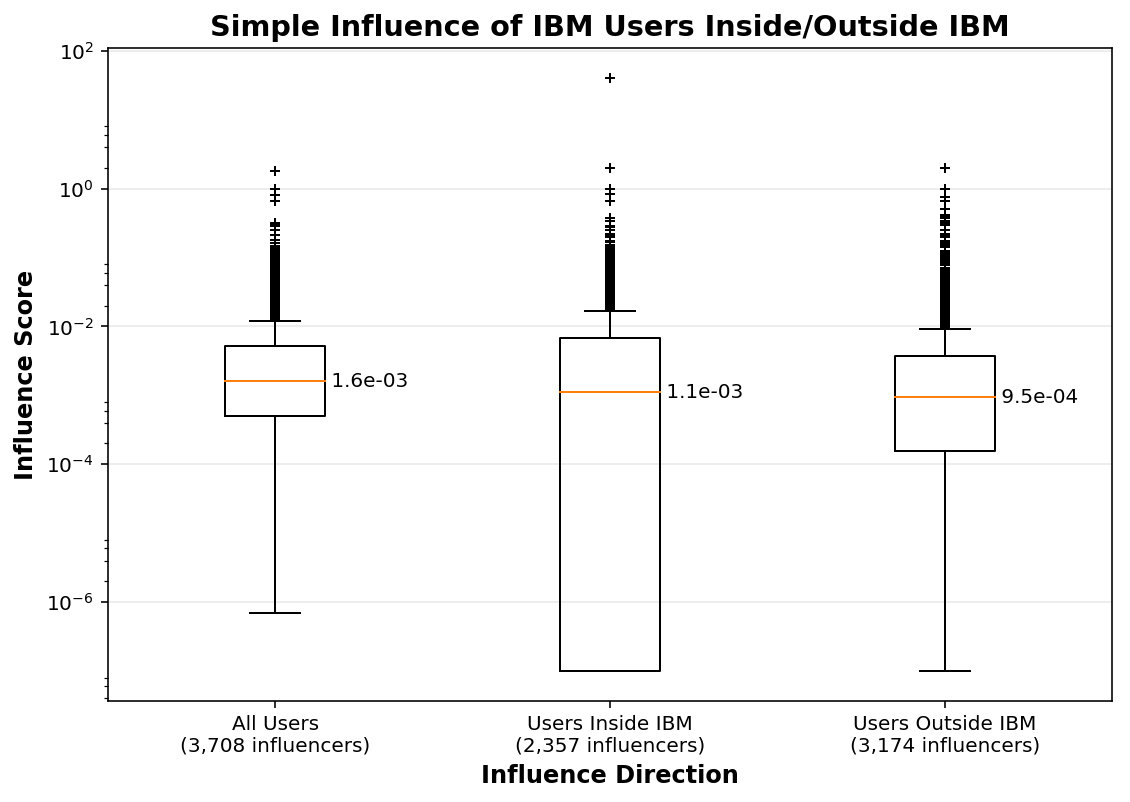

In [13]:
"""
Plot simple influence of M1 IBM users inside/outside IBM
"""
ibm_simple_influence_in_out_fig = os.path.join(FIG_DIR, 'ibm_simple_influence_in_out.png')
if 1 == 1:
    '''
    Prepare data
    '''
    # IBM users' influence to all users
    all_norm_s = df['fo_2'] * df['native_n']
    all_influence = df['all_srt'] / all_norm_s
    
    # IBM users' influence to IBM users (inside)
    in_norm_s = df['fo_ibm'] * df['native_n']
    in_norm_s = in_norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    in_influence = df['ibm_srt'] / in_norm_s
    
    # IBM users' influence to non-IBM users (outside)
    out_norm_s = df['fo_nonibm'] * df['native_n']
    out_influence = df['nonibm_srt'] / out_norm_s
    
    # limit the minimum influence value
    min_inf = 1e-7
    all_influence[all_influence < min_inf] = min_inf
    in_influence[in_influence < min_inf] = min_inf
    out_influence[out_influence < min_inf] = min_inf

    data = [all_influence, in_influence, out_influence]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(9, 6))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title("Simple Influence of IBM Users Inside/Outside IBM", fontdict=title_fontdict)
    
    label_fontdict = {'weight': 'bold', 'size': 'large'}
    ax.set_xlabel('Influence Direction', fontdict=label_fontdict)
    ax.set_ylabel('Influence Score', fontdict=label_fontdict)
    ax.set_xticklabels(['All Users\n({:,} influencers)'.format(all_influence.shape[0]),
                        'Users Inside IBM\n({:,} influencers)'.format(df_in.shape[0]),
                        'Users Outside IBM\n({:,} influencers)'.format(df_out.shape[0])])
    ax.set_yscale('log')
    
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, '{:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')
    
    '''
    Save figure
    '''
    plt.savefig(ibm_simple_influence_in_out_fig, dpi=200)

In [11]:
df.describe()

,uid,fo,all_n,all_srt,ibm_n,ibm_srt,nonibm_n,nonibm_srt,fo_2,fo_ibm,native_n,fo_nonibm
count,3.708000e+03,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000
mean,5.060382e+16,2086.938781,7.495955,35.831446,3.880529,11.131607,6.029935,24.699838,2103.889428,194.117584,19.926645,1909.771845
std,1.919076e+17,10348.294746,24.609970,359.441014,17.151148,114.842189,22.060280,251.072907,10405.718706,640.664591,56.686660,9915.959737
min,1.142600e+04,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
25%,5.874478e+07,159.750000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,167.000000,26.000000,2.000000,123.000000
50%,3.700978e+08,403.000000,2.000000,4.000000,1.000000,1.000000,1.000000,2.000000,415.500000,69.000000,5.000000,317.000000
75%,2.204183e+09,1140.250000,5.000000,10.000000,2.000000,3.000000,4.000000,6.000000,1167.250000,165.000000,17.000000,991.000000
max,8.623589e+17,360556.000000,428.000000,14497.000000,333.000000,4877.000000,426.000000,9620.000000,362337.000000,16223.000000,1330.000000,346114.000000


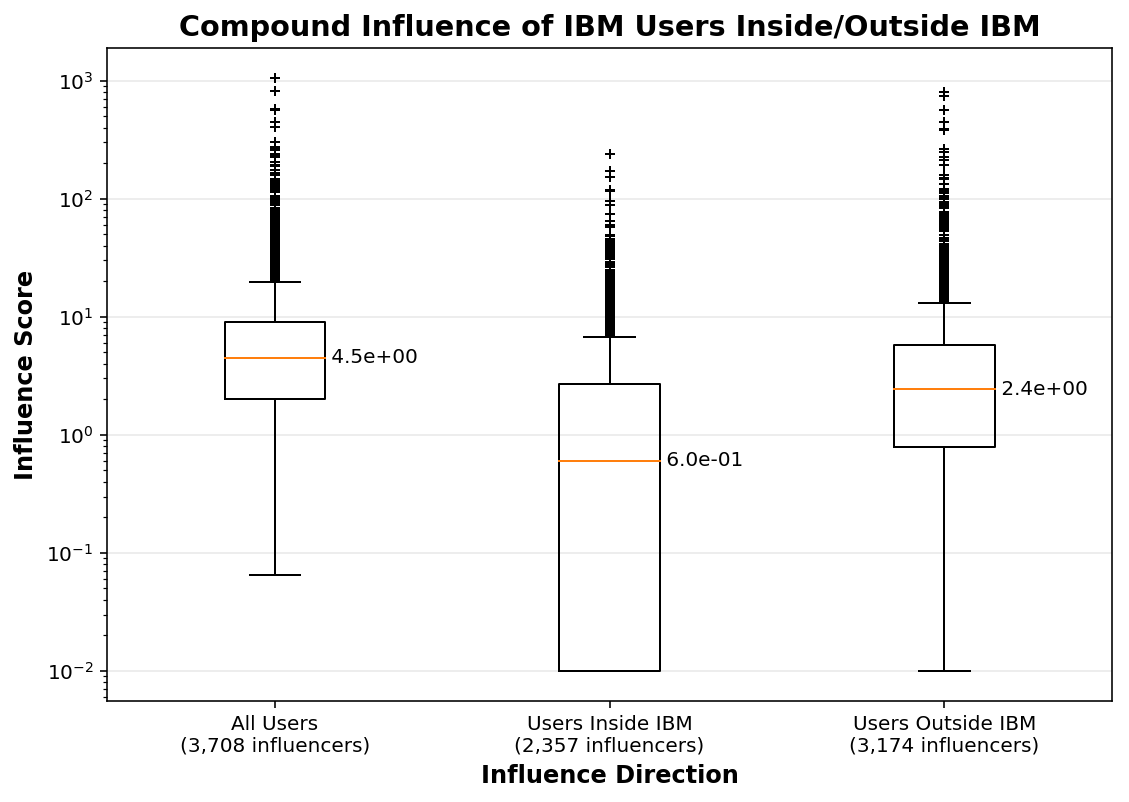

In [12]:
"""
Plot compound influence of M1 IBM users inside/outside IBM
"""
ibm_compound_influence_in_out_fig = os.path.join(FIG_DIR, 'ibm_compound_influence_in_out.png')
if 1 == 1:
    '''
    Prepare data
    '''    
    # IBM users' influence to all users
    all_arc = df['all_srt'] / df['native_n']
    all_influence = all_arc * np.log(df['fo_2'])
    
    # IBM users' influence to IBM users (inside)
    ibm_arc = df['ibm_srt'] / df['native_n']
    cleaned_ibm_fo = df['fo_ibm'].replace(to_replace=0, value=1) # clean 0 values since its denominator
    in_influence = ibm_arc * np.log(cleaned_ibm_fo)
        
    # IBM users' influence to non-IBM users (outside)
    nonibm_arc = df['nonibm_srt'] / df['native_n']
    out_influence = nonibm_arc * np.log(df['fo_nonibm'])
    
    # limit the minimum influence value
    min_inf = 1e-2
    all_influence[all_influence < min_inf] = min_inf
    in_influence[in_influence < min_inf] = min_inf
    out_influence[out_influence < min_inf] = min_inf
    
    data = [all_influence, in_influence, out_influence]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(9, 6))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title("Compound Influence of IBM Users Inside/Outside IBM", fontdict=title_fontdict)
    
    label_fontdict = {'weight': 'bold', 'size': 'large'}
    ax.set_xlabel('Influence Direction', fontdict=label_fontdict)
    ax.set_ylabel('Influence Score', fontdict=label_fontdict)
    ax.set_xticklabels(['All Users\n({:,} influencers)'.format(all_influence.shape[0]),
                        'Users Inside IBM\n({:,} influencers)'.format(df_in.shape[0]),
                        'Users Outside IBM\n({:,} influencers)'.format(df_out.shape[0])])
    ax.set_yscale('log')
    
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, '{:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')
    
    '''
    Save figure
    '''
    plt.savefig(ibm_compound_influence_in_out_fig, dpi=200)